Collected 1: Time=0.001s, Force=-4.038, PWM=1, Voltage=2.009
Collected 2: Time=0.002s, Force=-4.035, PWM=1, Voltage=2.087
Collected 3: Time=0.002s, Force=-4.034, PWM=1, Voltage=2.072
Collected 4: Time=0.002s, Force=-4.034, PWM=1, Voltage=2.063
Collected 5: Time=0.002s, Force=-4.033, PWM=1, Voltage=1.994
Collected 6: Time=0.003s, Force=-4.033, PWM=1, Voltage=2.048
Collected 7: Time=0.003s, Force=-4.032, PWM=1, Voltage=2.058
Collected 8: Time=0.003s, Force=-4.032, PWM=1, Voltage=1.975
Collected 9: Time=0.004s, Force=-3.893, PWM=5, Voltage=2.023
Collected 10: Time=0.004s, Force=-1.667, PWM=75, Voltage=2.048
Collected 11: Time=0.004s, Force=-0.106, PWM=123, Voltage=1.975
Collected 12: Time=0.004s, Force=1.483, PWM=173, Voltage=1.95
Collected 13: Time=0.005s, Force=2.841, PWM=215, Voltage=1.862
Collected 14: Time=0.005s, Force=3.761, PWM=244, Voltage=1.73
Collected 15: Time=0.005s, Force=4.101, PWM=255, Voltage=1.515
Collected 16: Time=0.005s, Force=3.807, PWM=245, Voltage=1.359
Collected 1

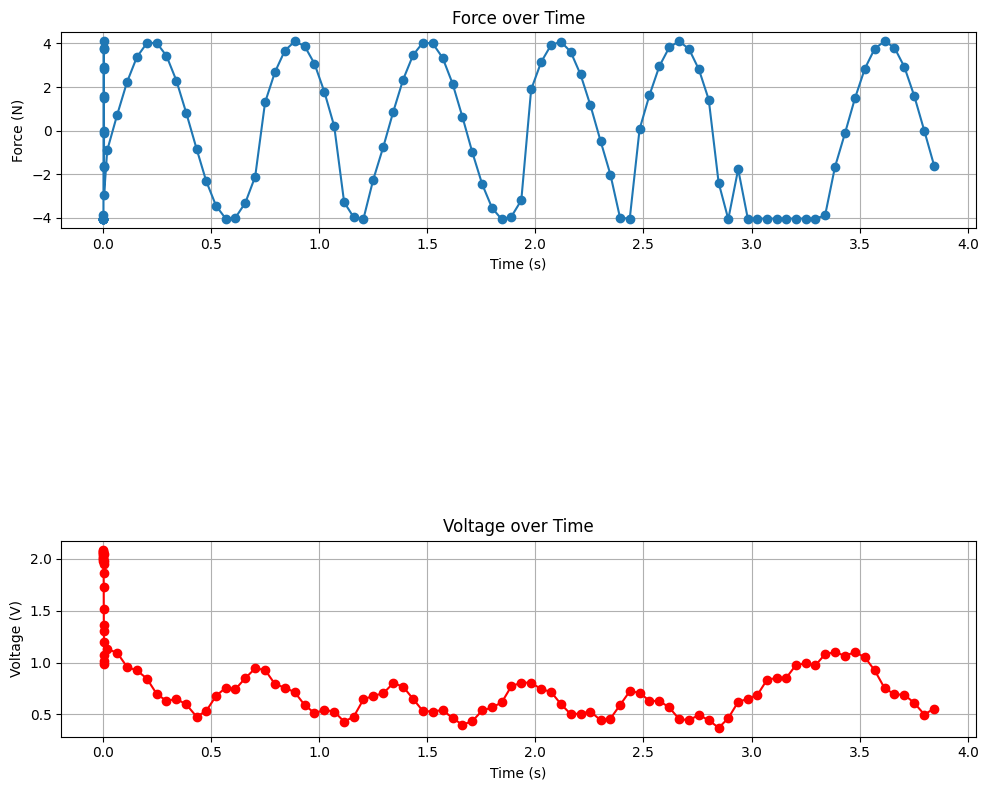

In [54]:
import serial
import time
import re
import matplotlib.pyplot as plt

serial_port = '/dev/cu.usbserial-02477668' 
baud_rate = 9600


ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2)  
num_points = 106
forces = []
pwms = []
voltages = []
timestamps = []  

pattern = re.compile(
    r"Force:\s*([-+.\d]+)\s*N,\s*PWM:\s*(\d+),\s*Voltage:\s*([-+.\d]+)\s*V"
)
start_time = time.time()

while len(forces) < num_points:
    try:
        line = ser.readline().decode('utf-8').strip()
    except UnicodeDecodeError:
        continue 
    if line:
        match = pattern.search(line)
        if match:
            current_time = time.time() - start_time  
            force_val = float(match.group(1))
            pwm_val = int(match.group(2))
            voltage_val = float(match.group(3))
            forces.append(force_val)
            pwms.append(pwm_val)
            voltages.append(voltage_val)
            timestamps.append(current_time)
            print(f"Collected {len(forces)}: Time={current_time:.3f}s, Force={force_val}, PWM={pwm_val}, Voltage={voltage_val}")

ser.close()
plt.figure(figsize=(10, 8))

# Force over time
plt.subplot(3, 1, 1)
plt.plot(timestamps, forces, marker='o')
plt.title("Force over Time")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid(True)

# Voltage over time
plt.subplot(3, 1, 3)
plt.plot(timestamps, voltages, marker='o', color='red')
plt.title("Voltage over Time")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)

plt.tight_layout()
plt.show()


Collected 1: Time=0.001s, Force=-4.038, PWM=1, Voltage=2.077
Collected 2: Time=0.002s, Force=-4.035, PWM=1, Voltage=2.053
Collected 3: Time=0.003s, Force=-4.034, PWM=1, Voltage=2.004
Collected 4: Time=0.004s, Force=-4.034, PWM=1, Voltage=2.067
Collected 5: Time=0.004s, Force=-4.033, PWM=1, Voltage=2.053
Collected 6: Time=0.004s, Force=-4.033, PWM=1, Voltage=1.984
Collected 7: Time=0.005s, Force=-4.032, PWM=1, Voltage=2.043
Collected 8: Time=0.005s, Force=-4.032, PWM=1, Voltage=2.043
Collected 9: Time=0.005s, Force=-3.893, PWM=5, Voltage=1.965
Collected 10: Time=0.006s, Force=-1.667, PWM=75, Voltage=2.014
Collected 11: Time=0.006s, Force=-0.106, PWM=123, Voltage=2.043
Collected 12: Time=0.006s, Force=1.483, PWM=173, Voltage=1.994
Collected 13: Time=0.007s, Force=2.841, PWM=215, Voltage=1.784
Collected 14: Time=0.007s, Force=3.761, PWM=244, Voltage=1.676
Collected 15: Time=0.007s, Force=4.101, PWM=255, Voltage=1.559
Collected 16: Time=0.007s, Force=3.807, PWM=245, Voltage=1.369
Collected

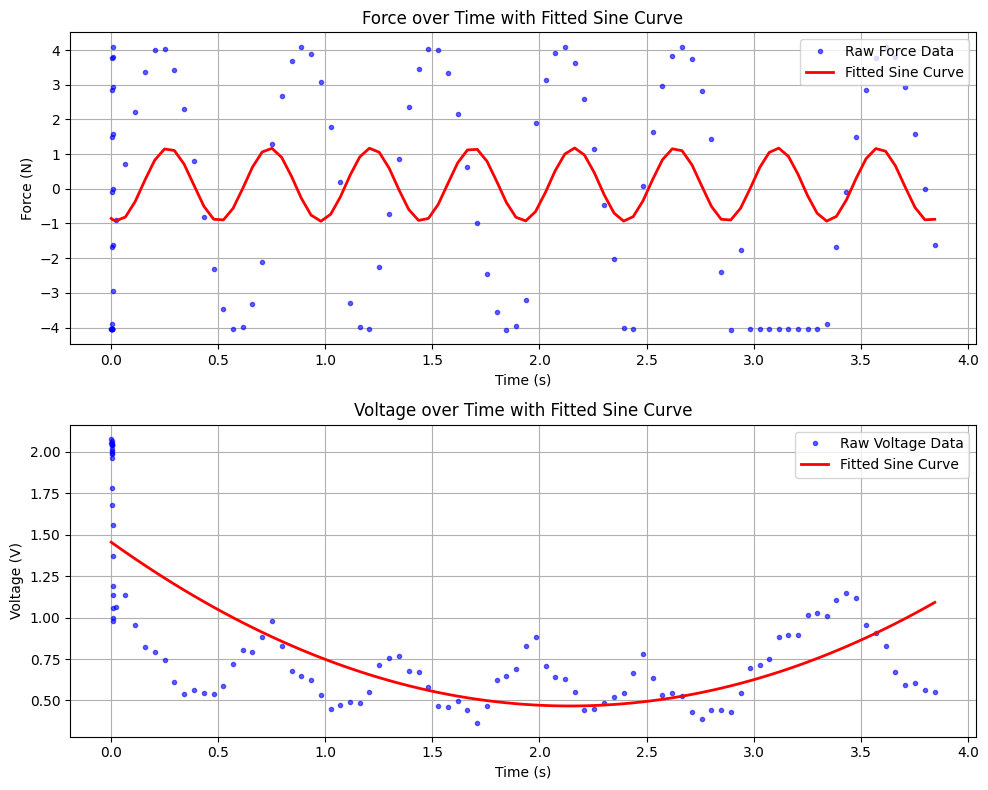

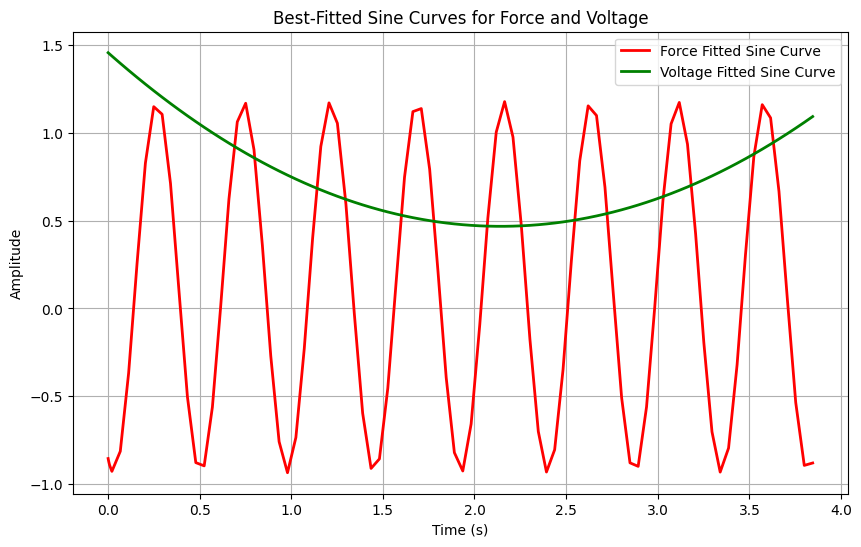

In [55]:
import serial
import time
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

serial_port = '/dev/cu.usbserial-02477668'
baud_rate = 9600

ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2)  

num_points = 106  
forces = []
pwms = []
voltages = []
timestamps = []  

pattern = re.compile(
    r"Force:\s*([-+.\d]+)\s*N,\s*PWM:\s*(\d+),\s*Voltage:\s*([-+.\d]+)\s*V"
)

start_time = time.time()

while len(forces) < num_points:
    try:
        line = ser.readline().decode('utf-8').strip()
    except UnicodeDecodeError:
        continue 
    if line:
        match = pattern.search(line)
        if match:
            current_time = time.time() - start_time  
            force_val = float(match.group(1))
            pwm_val = int(match.group(2))
            voltage_val = float(match.group(3))
            forces.append(force_val)
            pwms.append(pwm_val)
            voltages.append(voltage_val)
            timestamps.append(current_time)
            print(f"Collected {len(forces)}: Time={current_time:.3f}s, Force={force_val}, PWM={pwm_val}, Voltage={voltage_val}")

ser.close()


time_arr = np.array(timestamps)
forces_arr = np.array(forces)
voltages_arr = np.array(voltages)


def sine_func(t, A, omega, phase, offset):
    return A * np.sin(omega * t + phase) + offset

A_guess_force = (forces_arr.max() - forces_arr.min()) / 2
offset_guess_force = forces_arr.mean()
force_detrended = forces_arr - offset_guess_force
n = len(time_arr)
dt = np.mean(np.diff(time_arr))
freqs = np.fft.rfftfreq(n, d=dt)
fft_vals_force = np.abs(np.fft.rfft(force_detrended))
fft_vals_force[0] = 0  # Remove the DC component
peak_freq_force = freqs[np.argmax(fft_vals_force)]
omega_guess_force = 2 * np.pi * peak_freq_force
if omega_guess_force == 0:
    omega_guess_force = 2 * np.pi / (time_arr[-1] - time_arr[0])
phase_guess_force = 0
initial_guess_force = [A_guess_force, omega_guess_force, phase_guess_force, offset_guess_force]

popt_force, pcov_force = curve_fit(sine_func, time_arr, forces_arr,
                                   p0=initial_guess_force, maxfev=10000)
force_fit = sine_func(time_arr, *popt_force)


A_guess_voltage = (voltages_arr.max() - voltages_arr.min()) / 2
offset_guess_voltage = voltages_arr.mean()
voltage_detrended = voltages_arr - offset_guess_voltage
fft_vals_voltage = np.abs(np.fft.rfft(voltage_detrended))
fft_vals_voltage[0] = 0  # Remove the DC component
peak_freq_voltage = freqs[np.argmax(fft_vals_voltage)]
omega_guess_voltage = 2 * np.pi * peak_freq_voltage
if omega_guess_voltage == 0:
    omega_guess_voltage = 2 * np.pi / (time_arr[-1] - time_arr[0])
phase_guess_voltage = 0
initial_guess_voltage = [A_guess_voltage, omega_guess_voltage, phase_guess_voltage, offset_guess_voltage]

popt_voltage, pcov_voltage = curve_fit(sine_func, time_arr, voltages_arr,
                                        p0=initial_guess_voltage, maxfev=10000)
voltage_fit = sine_func(time_arr, *popt_voltage)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(time_arr, forces_arr, 'b.', label='Raw Force Data', alpha=0.6)
plt.plot(time_arr, force_fit, 'r-', label='Fitted Sine Curve', linewidth=2)
plt.title("Force over Time with Fitted Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_arr, voltages_arr, 'b.', label='Raw Voltage Data', alpha=0.6)
plt.plot(time_arr, voltage_fit, 'r-', label='Fitted Sine Curve', linewidth=2)
plt.title("Voltage over Time with Fitted Sine Curve")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Both Fitted Sine Curves on the Same Graph -----
plt.figure(figsize=(10, 6))
plt.plot(time_arr, force_fit, 'r-', label='Force Fitted Sine Curve', linewidth=2)
plt.plot(time_arr, voltage_fit, 'g-', label='Voltage Fitted Sine Curve', linewidth=2)
plt.title("Best-Fitted Sine Curves for Force and Voltage")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


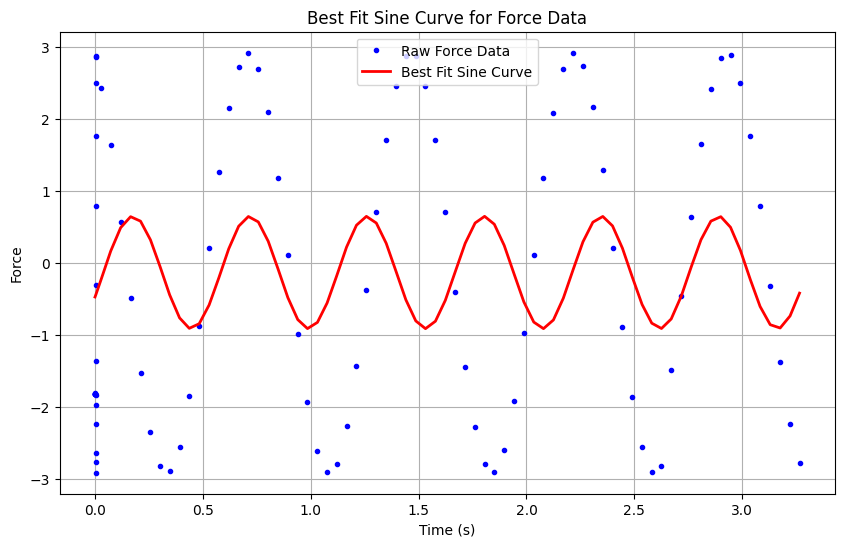

In [35]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Raw data as a multi-line string
data_str = """CCollected 1: Time=0.000s, Force=-1.804, PWM=48, Voltage=2.043
Collected 2: Time=0.001s, Force=-1.817, PWM=47, Voltage=2.043
Collected 3: Time=0.001s, Force=-1.819, PWM=47, Voltage=2.033
Collected 4: Time=0.002s, Force=-1.82, PWM=47, Voltage=2.038
Collected 5: Time=0.002s, Force=-1.821, PWM=47, Voltage=2.028
Collected 6: Time=0.002s, Force=-1.823, PWM=47, Voltage=2.019
Collected 7: Time=0.002s, Force=-1.824, PWM=47, Voltage=2.014
Collected 8: Time=0.002s, Force=-1.826, PWM=47, Voltage=2.014
Collected 9: Time=0.003s, Force=-1.828, PWM=47, Voltage=2.004
Collected 10: Time=0.003s, Force=-1.974, PWM=41, Voltage=1.994
Collected 11: Time=0.003s, Force=-2.635, PWM=12, Voltage=1.994
Collected 12: Time=0.003s, Force=-2.912, PWM=0, Voltage=1.984
Collected 13: Time=0.003s, Force=-2.77, PWM=6, Voltage=1.984
Collected 14: Time=0.004s, Force=-2.229, PWM=29, Voltage=1.979
Collected 15: Time=0.004s, Force=-1.365, PWM=67, Voltage=1.979
Collected 16: Time=0.004s, Force=-0.311, PWM=113, Voltage=1.975
Collected 17: Time=0.004s, Force=0.785, PWM=161, Voltage=1.965
Collected 18: Time=0.004s, Force=1.76, PWM=204, Voltage=1.808
Collected 19: Time=0.005s, Force=2.497, PWM=236, Voltage=1.652
Collected 20: Time=0.005s, Force=2.878, PWM=253, Voltage=1.491
Collected 21: Time=0.005s, Force=2.851, PWM=252, Voltage=1.344
Collected 22: Time=0.027s, Force=2.421, PWM=233, Voltage=1.222
Collected 23: Time=0.073s, Force=1.636, PWM=198, Voltage=1.109
Collected 24: Time=0.119s, Force=0.573, PWM=152, Voltage=1.002
Collected 25: Time=0.165s, Force=-0.484, PWM=106, Voltage=0.899
Collected 26: Time=0.211s, Force=-1.524, PWM=60, Voltage=0.89
Collected 27: Time=0.257s, Force=-2.341, PWM=24, Voltage=0.934
Collected 28: Time=0.301s, Force=-2.821, PWM=3, Voltage=0.978
Collected 29: Time=0.346s, Force=-2.895, PWM=0, Voltage=1.012
Collected 30: Time=0.392s, Force=-2.554, PWM=15, Voltage=1.056
Collected 31: Time=0.437s, Force=-1.848, PWM=46, Voltage=1.095
Collected 32: Time=0.483s, Force=-0.876, PWM=89, Voltage=1.119
Collected 33: Time=0.529s, Force=0.203, PWM=136, Voltage=1.149
Collected 34: Time=0.574s, Force=1.266, PWM=182, Voltage=1.022
Collected 35: Time=0.620s, Force=2.146, PWM=221, Voltage=0.904
Collected 36: Time=0.666s, Force=2.725, PWM=246, Voltage=0.806
Collected 37: Time=0.711s, Force=2.917, PWM=255, Voltage=0.718
Collected 38: Time=0.757s, Force=2.697, PWM=245, Voltage=0.66
Collected 39: Time=0.803s, Force=2.094, PWM=218, Voltage=0.601
Collected 40: Time=0.848s, Force=1.183, PWM=179, Voltage=0.547
Collected 41: Time=0.894s, Force=0.109, PWM=132, Voltage=0.508
Collected 42: Time=0.940s, Force=-0.981, PWM=84, Voltage=0.479
Collected 43: Time=0.985s, Force=-1.932, PWM=42, Voltage=0.528
Collected 44: Time=1.031s, Force=-2.608, PWM=13, Voltage=0.611
Collected 45: Time=1.076s, Force=-2.907, PWM=0, Voltage=0.694
Collected 46: Time=1.120s, Force=-2.788, PWM=5, Voltage=0.767
Collected 47: Time=1.166s, Force=-2.27, PWM=28, Voltage=0.821
Collected 48: Time=1.212s, Force=-1.426, PWM=65, Voltage=0.87
Collected 49: Time=1.258s, Force=-0.379, PWM=110, Voltage=0.929
Collected 50: Time=1.304s, Force=0.707, PWM=158, Voltage=0.973
Collected 51: Time=1.350s, Force=1.703, PWM=201, Voltage=0.86
Collected 52: Time=1.395s, Force=2.459, PWM=234, Voltage=0.758
Collected 53: Time=1.441s, Force=2.865, PWM=252, Voltage=0.679
Collected 54: Time=1.487s, Force=2.866, PWM=252, Voltage=0.616
Collected 55: Time=1.532s, Force=2.462, PWM=235, Voltage=0.547
Collected 56: Time=1.578s, Force=1.709, PWM=202, Voltage=0.513
Collected 57: Time=1.624s, Force=0.713, PWM=158, Voltage=0.484
Collected 58: Time=1.670s, Force=-0.398, PWM=109, Voltage=0.459
Collected 59: Time=1.716s, Force=-1.443, PWM=64, Voltage=0.508
Collected 60: Time=1.762s, Force=-2.283, PWM=27, Voltage=0.596
Collected 61: Time=1.806s, Force=-2.795, PWM=5, Voltage=0.684
Collected 62: Time=1.851s, Force=-2.906, PWM=0, Voltage=0.753
Collected 63: Time=1.897s, Force=-2.6, PWM=13, Voltage=0.802
Collected 64: Time=1.942s, Force=-1.922, PWM=43, Voltage=0.855
Collected 65: Time=1.988s, Force=-0.97, PWM=84, Voltage=0.909
Collected 66: Time=2.034s, Force=0.106, PWM=132, Voltage=0.948
Collected 67: Time=2.079s, Force=1.177, PWM=178, Voltage=0.831
Collected 68: Time=2.125s, Force=2.08, PWM=218, Voltage=0.733
Collected 69: Time=2.171s, Force=2.688, PWM=244, Voltage=0.655
Collected 70: Time=2.217s, Force=2.917, PWM=255, Voltage=0.582
Collected 71: Time=2.262s, Force=2.733, PWM=246, Voltage=0.523
Collected 72: Time=2.308s, Force=2.161, PWM=221, Voltage=0.484
Collected 73: Time=2.354s, Force=1.283, PWM=183, Voltage=0.464
Collected 74: Time=2.399s, Force=0.209, PWM=136, Voltage=0.435
Collected 75: Time=2.445s, Force=-0.888, PWM=88, Voltage=0.411
Collected 76: Time=2.491s, Force=-1.857, PWM=46, Voltage=0.479
Collected 77: Time=2.536s, Force=-2.561, PWM=15, Voltage=0.572
Collected 78: Time=2.581s, Force=-2.897, PWM=0, Voltage=0.655
Collected 79: Time=2.626s, Force=-2.817, PWM=4, Voltage=0.723
Collected 80: Time=2.671s, Force=-1.491, PWM=62, Voltage=0.792
Collected 81: Time=2.718s, Force=-0.453, PWM=107, Voltage=0.846
Collected 82: Time=2.764s, Force=0.638, PWM=155, Voltage=0.894
Collected 83: Time=2.809s, Force=1.644, PWM=199, Voltage=0.787
Collected 84: Time=2.855s, Force=2.419, PWM=233, Voltage=0.699
Collected 85: Time=2.901s, Force=2.85, PWM=252, Voltage=0.626
Collected 86: Time=2.946s, Force=2.879, PWM=253, Voltage=0.562
Collected 87: Time=2.992s, Force=2.5, PWM=236, Voltage=0.513
Collected 88: Time=3.038s, Force=1.768, PWM=204, Voltage=0.484
Collected 89: Time=3.083s, Force=0.783, PWM=161, Voltage=0.45
Collected 90: Time=3.130s, Force=-0.325, PWM=113, Voltage=0.425
Collected 91: Time=3.176s, Force=-1.378, PWM=67, Voltage=0.489
Collected 92: Time=3.222s, Force=-2.234, PWM=29, Voltage=0.587
Collected 93: Time=3.266s, Force=-2.772, PWM=6, Voltage=0.665
"""

# Parse the data using a regular expression
pattern = re.compile(r"Collected\s+\d+:\s+Time=([\d.]+)s,\s+Force=([-+\d.]+),\s+PWM=(\d+),\s+Voltage=([-+\d.]+)")
times, forces, pwms, voltages = [], [], [], []

for line in data_str.strip().split("\n"):
    match = pattern.search(line)
    if match:
        times.append(float(match.group(1)))
        forces.append(float(match.group(2)))
        pwms.append(int(match.group(3)))
        voltages.append(float(match.group(4)))

times = np.array(times)
forces = np.array(forces)

# Define a sine function model for fitting
def sine_func(t, A, omega, phase, offset):
    return A * np.sin(omega * t + phase) + offset

# Estimate initial parameters for the force data
A_guess = (forces.max() - forces.min()) / 2
offset_guess = forces.mean()
# Detrend the data to help isolate the oscillatory component
force_detrended = forces - offset_guess

n = len(times)
dt = np.mean(np.diff(times))
freqs = np.fft.rfftfreq(n, d=dt)
fft_vals = np.abs(np.fft.rfft(force_detrended))
fft_vals[0] = 0  # Remove the zero-frequency (DC) component
peak_freq = freqs[np.argmax(fft_vals)]
omega_guess = 2 * np.pi * peak_freq
if omega_guess == 0:
    omega_guess = 2 * np.pi / (times[-1] - times[0])
phase_guess = 0

initial_guess = [A_guess, omega_guess, phase_guess, offset_guess]

# Perform the curve fitting
popt, pcov = curve_fit(sine_func, times, forces, p0=initial_guess, maxfev=10000)
fitted_forces = sine_func(times, *popt)

# Plot the raw force data and the best-fit sine curve
plt.figure(figsize=(10, 6))
plt.plot(times, forces, 'b.', label='Raw Force Data')
plt.plot(times, fitted_forces, 'r-', label='Best Fit Sine Curve', linewidth=2)
plt.title("Best Fit Sine Curve for Force Data")
plt.xlabel("Time (s)")
plt.ylabel("Force")
plt.legend()
plt.grid(True)
plt.show()


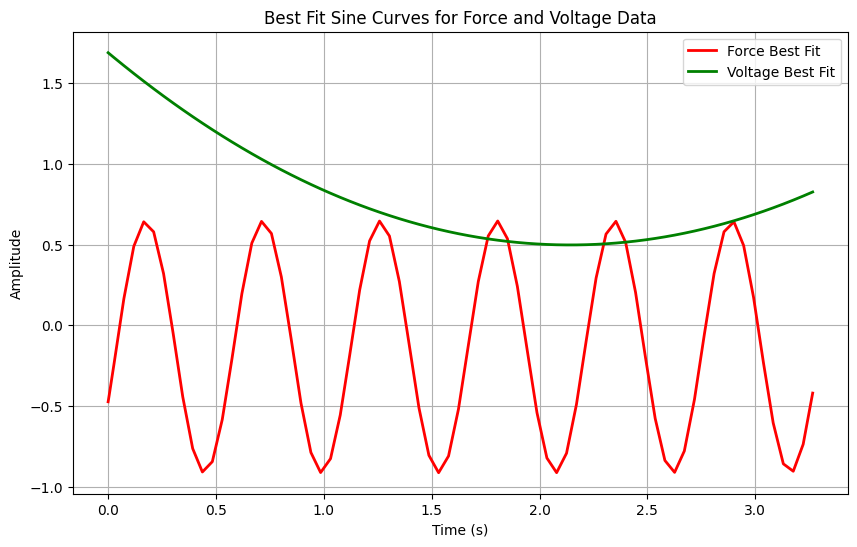

In [36]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Raw data as a multi-line string
data_str = """Collected 1: Time=0.000s, Force=-1.804, PWM=48, Voltage=2.043
Collected 2: Time=0.001s, Force=-1.817, PWM=47, Voltage=2.043
Collected 3: Time=0.001s, Force=-1.819, PWM=47, Voltage=2.033
Collected 4: Time=0.002s, Force=-1.82, PWM=47, Voltage=2.038
Collected 5: Time=0.002s, Force=-1.821, PWM=47, Voltage=2.028
Collected 6: Time=0.002s, Force=-1.823, PWM=47, Voltage=2.019
Collected 7: Time=0.002s, Force=-1.824, PWM=47, Voltage=2.014
Collected 8: Time=0.002s, Force=-1.826, PWM=47, Voltage=2.014
Collected 9: Time=0.003s, Force=-1.828, PWM=47, Voltage=2.004
Collected 10: Time=0.003s, Force=-1.974, PWM=41, Voltage=1.994
Collected 11: Time=0.003s, Force=-2.635, PWM=12, Voltage=1.994
Collected 12: Time=0.003s, Force=-2.912, PWM=0, Voltage=1.984
Collected 13: Time=0.003s, Force=-2.77, PWM=6, Voltage=1.984
Collected 14: Time=0.004s, Force=-2.229, PWM=29, Voltage=1.979
Collected 15: Time=0.004s, Force=-1.365, PWM=67, Voltage=1.979
Collected 16: Time=0.004s, Force=-0.311, PWM=113, Voltage=1.975
Collected 17: Time=0.004s, Force=0.785, PWM=161, Voltage=1.965
Collected 18: Time=0.004s, Force=1.76, PWM=204, Voltage=1.808
Collected 19: Time=0.005s, Force=2.497, PWM=236, Voltage=1.652
Collected 20: Time=0.005s, Force=2.878, PWM=253, Voltage=1.491
Collected 21: Time=0.005s, Force=2.851, PWM=252, Voltage=1.344
Collected 22: Time=0.027s, Force=2.421, PWM=233, Voltage=1.222
Collected 23: Time=0.073s, Force=1.636, PWM=198, Voltage=1.109
Collected 24: Time=0.119s, Force=0.573, PWM=152, Voltage=1.002
Collected 25: Time=0.165s, Force=-0.484, PWM=106, Voltage=0.899
Collected 26: Time=0.211s, Force=-1.524, PWM=60, Voltage=0.89
Collected 27: Time=0.257s, Force=-2.341, PWM=24, Voltage=0.934
Collected 28: Time=0.301s, Force=-2.821, PWM=3, Voltage=0.978
Collected 29: Time=0.346s, Force=-2.895, PWM=0, Voltage=1.012
Collected 30: Time=0.392s, Force=-2.554, PWM=15, Voltage=1.056
Collected 31: Time=0.437s, Force=-1.848, PWM=46, Voltage=1.095
Collected 32: Time=0.483s, Force=-0.876, PWM=89, Voltage=1.119
Collected 33: Time=0.529s, Force=0.203, PWM=136, Voltage=1.149
Collected 34: Time=0.574s, Force=1.266, PWM=182, Voltage=1.022
Collected 35: Time=0.620s, Force=2.146, PWM=221, Voltage=0.904
Collected 36: Time=0.666s, Force=2.725, PWM=246, Voltage=0.806
Collected 37: Time=0.711s, Force=2.917, PWM=255, Voltage=0.718
Collected 38: Time=0.757s, Force=2.697, PWM=245, Voltage=0.66
Collected 39: Time=0.803s, Force=2.094, PWM=218, Voltage=0.601
Collected 40: Time=0.848s, Force=1.183, PWM=179, Voltage=0.547
Collected 41: Time=0.894s, Force=0.109, PWM=132, Voltage=0.508
Collected 42: Time=0.940s, Force=-0.981, PWM=84, Voltage=0.479
Collected 43: Time=0.985s, Force=-1.932, PWM=42, Voltage=0.528
Collected 44: Time=1.031s, Force=-2.608, PWM=13, Voltage=0.611
Collected 45: Time=1.076s, Force=-2.907, PWM=0, Voltage=0.694
Collected 46: Time=1.120s, Force=-2.788, PWM=5, Voltage=0.767
Collected 47: Time=1.166s, Force=-2.27, PWM=28, Voltage=0.821
Collected 48: Time=1.212s, Force=-1.426, PWM=65, Voltage=0.87
Collected 49: Time=1.258s, Force=-0.379, PWM=110, Voltage=0.929
Collected 50: Time=1.304s, Force=0.707, PWM=158, Voltage=0.973
Collected 51: Time=1.350s, Force=1.703, PWM=201, Voltage=0.86
Collected 52: Time=1.395s, Force=2.459, PWM=234, Voltage=0.758
Collected 53: Time=1.441s, Force=2.865, PWM=252, Voltage=0.679
Collected 54: Time=1.487s, Force=2.866, PWM=252, Voltage=0.616
Collected 55: Time=1.532s, Force=2.462, PWM=235, Voltage=0.547
Collected 56: Time=1.578s, Force=1.709, PWM=202, Voltage=0.513
Collected 57: Time=1.624s, Force=0.713, PWM=158, Voltage=0.484
Collected 58: Time=1.670s, Force=-0.398, PWM=109, Voltage=0.459
Collected 59: Time=1.716s, Force=-1.443, PWM=64, Voltage=0.508
Collected 60: Time=1.762s, Force=-2.283, PWM=27, Voltage=0.596
Collected 61: Time=1.806s, Force=-2.795, PWM=5, Voltage=0.684
Collected 62: Time=1.851s, Force=-2.906, PWM=0, Voltage=0.753
Collected 63: Time=1.897s, Force=-2.6, PWM=13, Voltage=0.802
Collected 64: Time=1.942s, Force=-1.922, PWM=43, Voltage=0.855
Collected 65: Time=1.988s, Force=-0.97, PWM=84, Voltage=0.909
Collected 66: Time=2.034s, Force=0.106, PWM=132, Voltage=0.948
Collected 67: Time=2.079s, Force=1.177, PWM=178, Voltage=0.831
Collected 68: Time=2.125s, Force=2.08, PWM=218, Voltage=0.733
Collected 69: Time=2.171s, Force=2.688, PWM=244, Voltage=0.655
Collected 70: Time=2.217s, Force=2.917, PWM=255, Voltage=0.582
Collected 71: Time=2.262s, Force=2.733, PWM=246, Voltage=0.523
Collected 72: Time=2.308s, Force=2.161, PWM=221, Voltage=0.484
Collected 73: Time=2.354s, Force=1.283, PWM=183, Voltage=0.464
Collected 74: Time=2.399s, Force=0.209, PWM=136, Voltage=0.435
Collected 75: Time=2.445s, Force=-0.888, PWM=88, Voltage=0.411
Collected 76: Time=2.491s, Force=-1.857, PWM=46, Voltage=0.479
Collected 77: Time=2.536s, Force=-2.561, PWM=15, Voltage=0.572
Collected 78: Time=2.581s, Force=-2.897, PWM=0, Voltage=0.655
Collected 79: Time=2.626s, Force=-2.817, PWM=4, Voltage=0.723
Collected 80: Time=2.671s, Force=-1.491, PWM=62, Voltage=0.792
Collected 81: Time=2.718s, Force=-0.453, PWM=107, Voltage=0.846
Collected 82: Time=2.764s, Force=0.638, PWM=155, Voltage=0.894
Collected 83: Time=2.809s, Force=1.644, PWM=199, Voltage=0.787
Collected 84: Time=2.855s, Force=2.419, PWM=233, Voltage=0.699
Collected 85: Time=2.901s, Force=2.85, PWM=252, Voltage=0.626
Collected 86: Time=2.946s, Force=2.879, PWM=253, Voltage=0.562
Collected 87: Time=2.992s, Force=2.5, PWM=236, Voltage=0.513
Collected 88: Time=3.038s, Force=1.768, PWM=204, Voltage=0.484
Collected 89: Time=3.083s, Force=0.783, PWM=161, Voltage=0.45
Collected 90: Time=3.130s, Force=-0.325, PWM=113, Voltage=0.425
Collected 91: Time=3.176s, Force=-1.378, PWM=67, Voltage=0.489
Collected 92: Time=3.222s, Force=-2.234, PWM=29, Voltage=0.587
Collected 93: Time=3.266s, Force=-2.772, PWM=6, Voltage=0.665
"""

# Parse the data using a regular expression
pattern = re.compile(r"Collected\s+\d+:\s+Time=([\d.]+)s,\s+Force=([-+\d.]+),\s+PWM=(\d+),\s+Voltage=([-+\d.]+)")
times, forces, pwms, voltages = [], [], [], []

for line in data_str.strip().split("\n"):
    match = pattern.search(line)
    if match:
        times.append(float(match.group(1)))
        forces.append(float(match.group(2)))
        pwms.append(int(match.group(3)))
        voltages.append(float(match.group(4)))

times = np.array(times)
forces = np.array(forces)
voltages = np.array(voltages)

# Define the sine function model for fitting
def sine_func(t, A, omega, phase, offset):
    return A * np.sin(omega * t + phase) + offset

# -------- Fit the Force Data --------
A_guess_force = (forces.max() - forces.min()) / 2
offset_guess_force = forces.mean()
force_detrended = forces - offset_guess_force

n = len(times)
dt = np.mean(np.diff(times))
freqs = np.fft.rfftfreq(n, d=dt)
fft_vals_force = np.abs(np.fft.rfft(force_detrended))
fft_vals_force[0] = 0  # ignore DC component
peak_freq_force = freqs[np.argmax(fft_vals_force)]
omega_guess_force = 2 * np.pi * peak_freq_force
if omega_guess_force == 0:
    omega_guess_force = 2 * np.pi / (times[-1] - times[0])
phase_guess_force = 0

initial_guess_force = [A_guess_force, omega_guess_force, phase_guess_force, offset_guess_force]
popt_force, _ = curve_fit(sine_func, times, forces, p0=initial_guess_force, maxfev=10000)
fitted_forces = sine_func(times, *popt_force)

# -------- Fit the Voltage Data --------
A_guess_voltage = (voltages.max() - voltages.min()) / 2
offset_guess_voltage = voltages.mean()
voltage_detrended = voltages - offset_guess_voltage

fft_vals_voltage = np.abs(np.fft.rfft(voltage_detrended))
fft_vals_voltage[0] = 0  # ignore DC component
peak_freq_voltage = freqs[np.argmax(fft_vals_voltage)]
omega_guess_voltage = 2 * np.pi * peak_freq_voltage
if omega_guess_voltage == 0:
    omega_guess_voltage = 2 * np.pi / (times[-1] - times[0])
phase_guess_voltage = 0

initial_guess_voltage = [A_guess_voltage, omega_guess_voltage, phase_guess_voltage, offset_guess_voltage]
popt_voltage, _ = curve_fit(sine_func, times, voltages, p0=initial_guess_voltage, maxfev=10000)
fitted_voltages = sine_func(times, *popt_voltage)

# -------- Plot Both Best-Fit Curves on the Same Plot --------
plt.figure(figsize=(10, 6))
plt.plot(times, fitted_forces, 'r-', label='Force Best Fit', linewidth=2)
plt.plot(times, fitted_voltages, 'g-', label='Voltage Best Fit', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Best Fit Sine Curves for Force and Voltage Data")
plt.legend()
plt.grid(True)
plt.show()
